In [1]:
import glob
import scipy.io
import os
import scipy.stats
import time
%load_ext autoreload
%autoreload 2

In [2]:
import sklearn.neighbors
from scipy.cluster.vq import whiten
from scipy.sparse import csr_matrix, find
import scipy.io

In [3]:
import sys
sys.path.append('/Users/rsingh/Oyla/Work/our_python_dev/')
from oyla.mvc.filters import *

In [4]:
import open3d as o3d
import numpy as np
from matplotlib import cm
import matplotlib.pyplot as plt
%matplotlib inline
from oyla.utils import *
from oyla.mvc.utils import *

In [5]:
dir_path='/Volumes/Samsung_T5/Backup//Oyla/02 Technical/'+'10 Data/44x33/oyla_1_camera_v2/SocDist2_data_August_21_19_53_47//'

In [6]:
input_data_folder_name =  dir_path
csv_file = input_data_folder_name+'/parameters.csv'
parameters = read_csv_parameters(csv_file)
filter_params = {}
ambiguity_distance, range_max, range_min, saturation_flag, adc_flag, mod_freq, ampl_min,reflectivity_thresh = some_common_utility(parameters,0)
reflectivity_thresh=0

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [59]:
filter_params = {}
filter_parameters = {}
filter_parameters['filter_cmd'] = {}
filter_parameters = read_csv_parameters("/Users/rsingh/Oyla/Work/our_python_dev/oyla/mvc/filter_params_edge.csv")
for k in filter_parameters['filter_cmd'].keys():
        #print(parameters['filter_cmd'][k][self.epoch_number])
        try:
                filter_params[k] = int(filter_parameters['filter_cmd'][k][0])
                #parameters['filter_cmd'][k][0] = filter_parameters['filter_cmd'][k][0]
        except ValueError:
                pass
#filter_params = {}

dict_keys(['Section', 'Type', 'Key', 'Argument Format', 'Value', 'Command Group', 'Description'])


In [60]:
index = np.random.randint(0,300)
#index = 0
#index = 200
print(index)
pcd = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(index).zfill(4)+'.xyz',format='xyz')
pcd_f = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(index+1).zfill(4)+'.xyz',format='xyz')
data = scipy.io.loadmat(dir_path+'/data_1_'+str(index)+'.mat')['data']
data2 = scipy.io.loadmat(dir_path+'/data_1_'+str(index+1)+'.mat')['data']
rgb = data2[0][4]
raw_phase = data[0][2][0][0][:,:,0]
raw_ampl = data[0][2][0][0][:,:,1]
print(raw_phase.shape,rgb.shape)
rgb,raw_phase,raw_ampl = camera_calibrations(rgb,depth=raw_phase,ampl=raw_ampl,camera_version='oyla_1_camera_v3_dus')
#raw_phase = cv2.resize(raw_phase,(512,64))
#raw_ampl = cv2.resize(raw_ampl,(512,64))
#_rgb = cv2.resize(rgb,None,fx=120/212,fy=120/212)
#range_min = 500
#range_max = range_max-range_min
filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                            range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                            filter_params = filter_params, ambiguity_distance = ambiguity_distance,qp_phase=None, qp_ampl=None)
#filtered_phase = np.rot90(filtered_phase)
#thresholded_ampl = np.rot90(thresholded_ampl)
_filtered_phase = filtered_phase.astype('float32')/np.max(filtered_phase)
_thresholded_ampl = thresholded_ampl.astype('float32')/np.max(thresholded_ampl)
_rgb = cv2.resize(rgb,(_filtered_phase.shape[1],_filtered_phase.shape[0]))
_rgb = _rgb.astype('float32')/255.0

26
[Open3D WARNING] Read XYZ failed: unable to open file: /Volumes/Samsung_T5/Backup//Oyla/02 Technical/10 Data/44x33/oyla_1_camera_v2/SocDist2_data_August_21_19_53_47//kitti//3d/oyla_0026.xyz
[Open3D WARNING] Read XYZ failed: unable to open file: /Volumes/Samsung_T5/Backup//Oyla/02 Technical/10 Data/44x33/oyla_1_camera_v2/SocDist2_data_August_21_19_53_47//kitti//3d/oyla_0027.xyz
(160, 120) (360, 640, 3)
version 3
(360, 588, 3) (360, 588) (360, 588)
Doing wavelet GraceVet filtering
Doing edge detection


In [52]:
raw_phase = data[0][2][0][0][:,:,0]
raw_ampl = data[0][2][0][0][:,:,1]
np.unique(raw_phase[raw_ampl>30000])

array([65300, 65500], dtype=uint16)

In [53]:
A = cv2.imread('/Users/rsingh/Oyla/Data/')

(-0.5, 587.5, 359.5, -0.5)

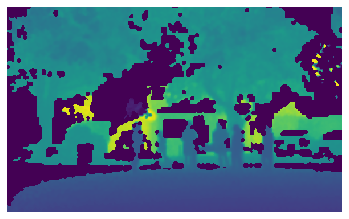

In [54]:
plt.imshow(filtered_phase)
plt.axis('off')

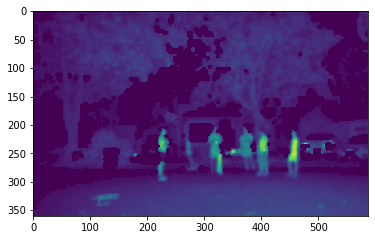

In [55]:
plt.imshow(thresholded_ampl)

In [13]:
    data = raw_phase[:,:,np.newaxis]
np.stack((raw_phase,raw_ampl),axis=2).shape

(160, 120, 2)

In [128]:
np.transpose(np.stack((raw_phase,raw_ampl),axis=2),(1,0,2)).shape[:2]

(120, 160)

In [63]:
print(filtered_phase.dtype)
_fp = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(filtered_phase,3),3),3)

float32


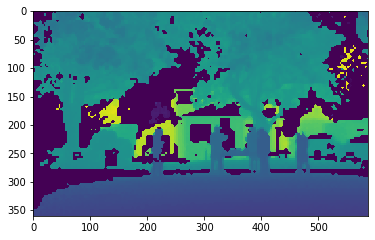

In [64]:
plt.imshow(_fp)

np.max(_fp)

In [65]:
cv2.imwrite('/Users/rsingh/Downloads/phase_org.png',filtered_phase.astype('uint16'))
cv2.imwrite('/Users/rsingh/Downloads/phase_filt.png',_fp.astype('uint16'))

True

In [66]:
rgb.dtype

dtype('uint8')

In [67]:
frgb = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(rgb.astype('float32')/255,3),3),3)

In [68]:
plt.imshow(frgb)

In [69]:
cv2.imwrite('/Users/rsingh/Downloads/rgb_org.png',rgb.astype('float32'))
cv2.imwrite('/Users/rsingh/Downloads/rgb_filt.png',frgb.astype('float32')*255)

True

In [82]:
quantized_phase = np.uint16(filtered_phase/128)*128

In [83]:
np.max(quantized_phase)

29824

In [84]:
_qfp = cv2.medianBlur(cv2.medianBlur(cv2.medianBlur(quantized_phase.astype('float32'),3),3),3)

In [85]:
_qfp.dtype

dtype('float32')

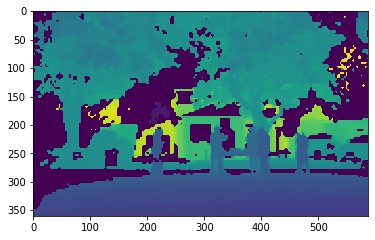

In [86]:
plt.imshow(_qfp)

In [87]:
cv2.imwrite('/Users/rsingh/Downloads/qphase_org.png',quantized_phase.astype('uint16'))
cv2.imwrite('/Users/rsingh/Downloads/qphase_filt.png',(_qfp).astype('uint16'))

True

a = format(filtered_phase[0,0].astype('uint16'), '015b')[::-1]#+format(thresholded_ampl[10,20].astype('uint16'), '09b')

In [39]:
def rgb2yuv(rgb):
    R,G,B = cv2.split(rgb)
    Y =  0.257 * R + 0.504 * G + 0.098 * B +  16;
    U = -0.148 * R - 0.291 * G + 0.439 * B + 128;
    V =  0.439 * R - 0.368 * G - 0.071 * B + 128;
    yuv = cv2.merge((Y,U,V))
    return yuv

In [40]:
def yuv2rgb(yuv):
    Y,U,V = cv2.split(yuv)
    Y -= 16;
    U -= 128;
    V -= 128;
    R = 1.164 * Y             + 1.596 * V;
    G = 1.164 * Y - 0.392 * U - 0.813 * V;
    B = 1.164 * Y + 2.017 * U;
    rgb = cv2.merge((R,G,B))
    return rgb

In [56]:
A = np.zeros_like(filtered_phase,dtype=np.uint8)
B = np.zeros_like(filtered_phase,dtype=np.uint8)
C = np.zeros_like(filtered_phase,dtype=np.uint8)
_thresholded_ampl = thresholded_ampl.copy()
_thresholded_ampl[_thresholded_ampl>511]=511
_fp = np.uint16(filtered_phase/512)*512
# _ta = np.uint16(_thresholded_ampl/16)*16
# XXX = []
# YYY = []
for i in range(filtered_phase.shape[0]):
    for j in range(filtered_phase.shape[1]):
        
        a = format(filtered_phase[i,j].astype('uint16'), '015b')[::-1]+format(_thresholded_ampl[i,j].astype('uint16'), '09b')
        #print(a)
        A[i,j] = int(a[:8][::-1],2) #LSB of phase
        B[i,j] = int(a[8:16][::-1],2) #MSB of phase +MSB of ampl
        C[i,j] = int(a[16:],2) #LSB of ampl
#         b = format(_s[i,j],'08b')[::-1]+format(_h[i,j],'08b')[::-1]+format(_v[i,j],'08b')
#         if a != b:
#             print(a,b)
#         decoded_phase[i,j] = int(a[:15][::-1],2)
#         decoded_ampl[i,j] = int(a[15:],2)
#         if a[15] == '1':
#             XXX.append(int(a[8:15][::-1],2))
#         else:
#             YYY.append(int(a[8:15][::-1],2))

255

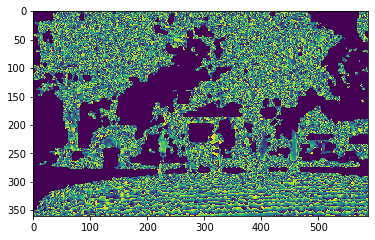

In [57]:
plt.imshow(A)
np.max(A)

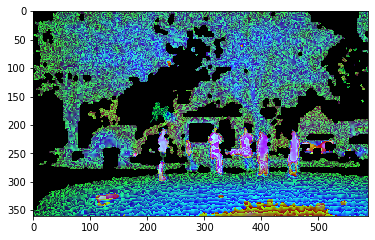

In [58]:
#_A = A.copy()
#_A[_A>0]=0
enc_hsv = cv2.merge((B,A,C))
#_h,_s,_v = cv2.split(enc_hsv)
plt.imshow(enc_hsv)
#plt.imshow(cv2.cvtColor(enc_hsv,cv2.COLOR_YUV2RGB))


In [17]:
enc_bgr = cv2.cvtColor(enc_hsv,cv2.COLOR_RGB2BGR)
cv2.imwrite('/Users/rsingh/Downloads/test.png',enc_bgr)
#enc_hsv2 = cv2.cvtColor(enc_bgr,cv2.COLOR_BGR2YUV)

True

In [18]:
dec_bgr = cv2.imread('/Users/rsingh/Downloads/test.png',cv2.IMREAD_UNCHANGED)
np.all(enc_bgr==dec_bgr)

True

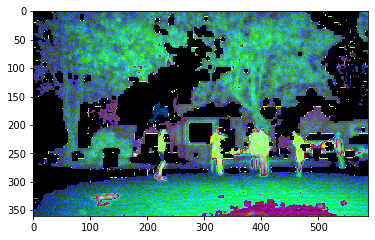

In [19]:
plt.imshow(cv2.cvtColor(dec_bgr,cv2.COLOR_BGR2RGB))

In [129]:
dec_bgr2 = cv2.imread('/Users/rsingh/Oyla/Data/RHouse_RH_February_07_18_54_22/oyla_output_PhaseAmplRGB15_fs_cds/decoded_png_phase_ampl_ffmpeg//oyla_0747.png',cv2.IMREAD_UNCHANGED)
dec_bgr3 = cv2.imread('/Users/rsingh/Oyla/Data/RHouse_RH_February_07_18_54_22/oyla_output_PhaseAmplRGB15_fs_cds/phase_ampl_png///oyla_0747.png',cv2.IMREAD_UNCHANGED)
plt.imshow(cv2.cvtColor(dec_bgr2,cv2.COLOR_BGR2RGB))

In [130]:
dec_bgr2.shape

(196, 320, 3)

In [131]:
#dec_hsv = dec_bgr
dec_hsv = cv2.cvtColor(dec_bgr2,cv2.COLOR_BGR2RGB)
#print(dec_hsv[dec_hsv!=enc_hsv2])
#print(enc_hsv2[dec_hsv!=enc_hsv2])
print(dec_hsv[dec_hsv!=enc_hsv])
print(enc_hsv[dec_hsv!=enc_hsv])
print(np.where(dec_hsv==enc_hsv)[0].shape[0])

[ 22  59  97 ...  28 102  52]
[ 26  52 160 ...  29 108  76]
134082


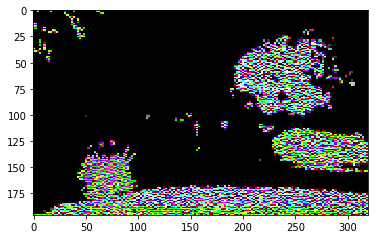

In [132]:
plt.imshow(dec_bgr2-dec_bgr3)

In [133]:
dec_hsv.shape

(196, 320, 3)

In [134]:
h,s,v = cv2.split(dec_hsv)
np.max(s)

255

In [135]:
print(np.all(C==s))
print(np.all(A==v))
print(np.all(B==h))

False
False
False


hsv = cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV)
rgb2 = cv2.cvtColor(hsv,cv2.COLOR_HSV2RGB)
np.max(rgb.astype('int')-rgb2.astype('int'))

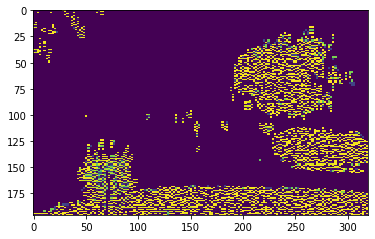

In [136]:
plt.imshow(C-s)

([array([47524.,  1526.,  2220.,  1498.,  1774.,  1660.,  1574.,  1534.,
          1890.,  1520.]),
  array([4.637e+04, 7.728e+03, 2.984e+03, 4.812e+03, 7.600e+01, 4.320e+02,
         2.660e+02, 1.200e+01, 4.000e+00, 3.600e+01]),
  array([45970.,   524.,  7530.,  3732.,  2272.,  1118.,   684.,   224.,
           246.,   420.]),
  array([4.822e+04, 5.902e+03, 3.744e+03, 4.098e+03, 2.120e+02, 2.400e+02,
         1.800e+02, 7.000e+01, 3.600e+01, 1.800e+01]),
  array([45920.,  1068.,  7150.,  3772.,  2230.,  1150.,   642.,   276.,
           206.,   306.]),
  array([45620.,  1694.,  2240.,  2532.,  2794.,  2550.,  2252.,  1454.,
           976.,   608.])],
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 6 Lists of Patches objects>)

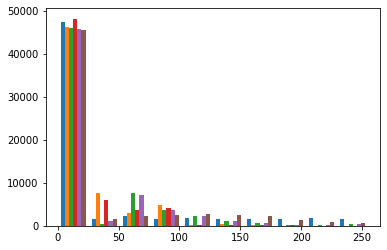

In [137]:
plt.hist(np.vstack((A.reshape(-1),B.reshape(-1),C.reshape(-1),h.reshape(-1),s.reshape(-1),v.reshape(-1))).T)

In [138]:
ind = np.where(A.astype('int')-v.astype('int')>0)
print(filtered_phase[ind])
print(thresholded_ampl[ind])
print(A[ind])
print(B[ind])
print(C[ind])

[6816. 6816. 7012. ... 7166. 7500. 7500.]
[ 52.  52.  58. ... 114. 108. 108.]
[160 160 100 ... 254  76  76]
[26 26 27 ... 27 29 29]
[ 52  52  58 ... 114 108 108]


In [139]:
np.max(_thresholded_ampl)

511.0

In [140]:
decoded_phase = np.zeros_like(h,dtype=np.uint16)
decoded_ampl = np.zeros_like(s,dtype=np.uint16)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        #B[i,j] = format(h[i,j],'08b')[::-1]
        #A[i,j] = format(s[i,j],'08b')[::-1]
        #C[i,j] = format(v[i,j],'08b')
        c = format(v[i,j],'08b')[::-1]+format(h[i,j],'08b')[::-1]+format(s[i,j],'08b')
        decoded_phase[i,j] = int(c[:15][::-1],2)
        decoded_ampl[i,j] = int(c[15:],2)
        #print(h[i,j],s[i,j],v[i,j],c)
        #a = format(filtered_phase[i,j].astype('uint16'), '015b')[::-1]+format(_thresholded_ampl[i,j].astype('uint16'), '09b')

        #print(B[i,j],A[i,j],C[i,j],a)

32707

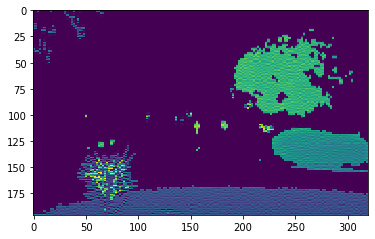

In [141]:
plt.imshow(decoded_phase)
np.max(decoded_phase)

29761.0

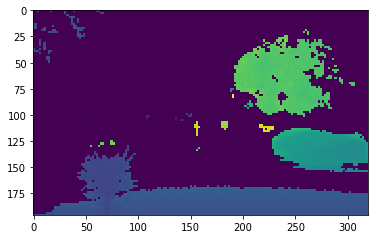

In [142]:
plt.imshow(filtered_phase)
np.max(filtered_phase)

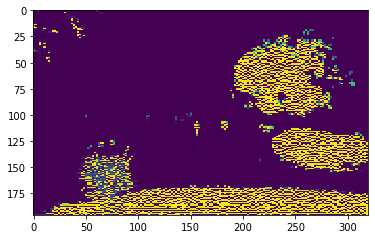

In [143]:
plt.imshow(decoded_phase-filtered_phase.astype('uint16'))

In [144]:
print(decoded_phase[np.where(decoded_phase!=filtered_phase)])
print(filtered_phase[np.where(decoded_phase!=filtered_phase)])

[ 5729  5729 10562 ...  9868  7220  7220]
[6816. 6816. 7012. ... 7012. 7500. 7500.]


(array([2.0000e+00, 0.0000e+00, 2.0000e+00, 2.0000e+00, 4.0000e+00,
        1.2000e+01, 1.0000e+01, 2.2000e+01, 4.4000e+01, 6.6000e+01,
        4.6000e+01, 1.6000e+01, 3.6000e+01, 2.0000e+01, 2.4000e+01,
        8.0000e+00, 4.0000e+00, 0.0000e+00, 0.0000e+00, 1.2000e+01,
        2.0000e+00, 2.0000e+00, 4.0000e+00, 4.0000e+00, 1.4000e+01,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
        6.0000e+00, 2.0000e+00, 4.4000e+01, 3.6000e+01, 3.6000e+01,
        3.0000e+01, 9.2000e+01, 7.8000e+01, 5.0000e+01, 7.2000e+01,
        1.2600e+02, 2.7600e+02, 4.4000e+02, 6.5600e+02, 9.8200e+02,
        1.2900e+03, 1.4360e+03, 1.7760e+03, 4.5542e+04, 2.3900e+03,
        1.8440e+03, 1.2360e+03, 9.3200e+02, 7.1400e+02, 4.1400e+02,
        3.0800e+02, 1.7800e+02, 1.3400e+02, 9.0000e+01, 6.8000e+01,
        6.6000e+01, 5.0000e+01, 4.8000e+01, 4.0000e+01, 4.0000e+01,
        2.4000e+01, 4.6000e+01, 3.4000e+01, 3.4000e+01, 3.2000e+01,
        4.0000e+01, 2.6000e+01, 2.0000e+01, 3.00

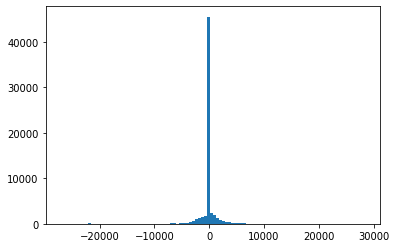

In [148]:
plt.hist(decoded_phase.astype('int').reshape(-1)-filtered_phase.astype('int').reshape(-1),100)


In [149]:
plt.hist(np.vstack((decoded_phase.reshape(-1),filtered_phase.reshape(-1))).T)

([array([46234.,  2090.,  4308.,  1912.,  1804.,  1980.,  3156.,  1014.,
           130.,    92.]),
  array([4.5894e+04, 8.5200e+02, 8.0460e+03, 4.0000e+00, 2.2440e+03,
         7.4400e+02, 4.5320e+03, 2.9200e+02, 1.0400e+02, 8.0000e+00])],
 array([    0. ,  3270.7,  6541.4,  9812.1, 13082.8, 16353.5, 19624.2,
        22894.9, 26165.6, 29436.3, 32707. ], dtype=float32),
 <a list of 2 Lists of Patches objects>)

30106

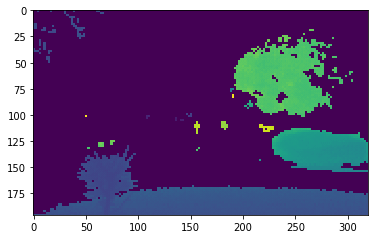

In [156]:
a = cv2.imread('/Users/rsingh/Oyla/Data/RHouse_RH_February_07_18_54_22/oyla_output_PhaseAmplRGB15_fs_cds//decoded_png_phase_ffmpeg//oyla_0747.png',cv2.IMREAD_UNCHANGED)
plt.imshow(a)
np.max(a)

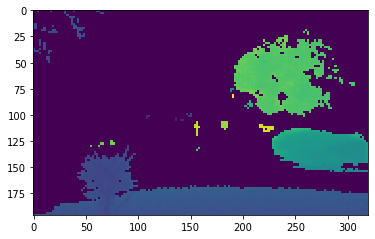

In [152]:
b = cv2.imread('/Users/rsingh/Oyla/Data/RHouse_RH_February_07_18_54_22/oyla_output_PhaseAmplRGB15_fs_cds//phase_png//oyla_0747.png',cv2.IMREAD_UNCHANGED)
plt.imshow(b)

([array([45938.,    68.,  8770.,    60.,   973.,  1827.,   301.,  4631.,
            56.,    96.]),
  array([4.589e+04, 3.600e+01, 8.710e+03, 1.560e+02, 9.920e+02, 1.800e+03,
         3.640e+02, 4.620e+03, 6.400e+01, 8.800e+01])],
 array([    0. ,  3010.6,  6021.2,  9031.8, 12042.4, 15053. , 18063.6,
        21074.2, 24084.8, 27095.4, 30106. ]),
 <a list of 2 Lists of Patches objects>)

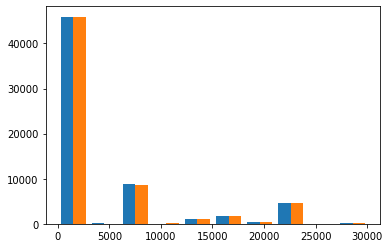

In [153]:
plt.hist(np.vstack((a.reshape(-1),b.reshape(-1))).T)

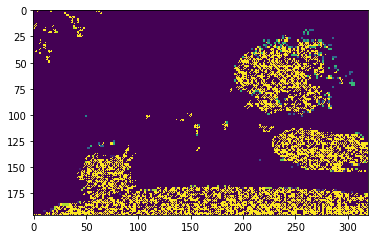

In [154]:
plt.imshow(a-b.astype('uint16'))

(array([4.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.600e+01,
        3.200e+01, 5.200e+01, 4.800e+01, 1.160e+02, 2.800e+01, 0.000e+00,
        0.000e+00, 4.000e+00, 8.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 0.000e+00, 1.200e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 4.800e+01, 2.800e+01, 1.600e+01, 8.000e+00, 8.000e+00,
        4.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+01, 6.950e+02, 5.897e+04,
        2.149e+03, 4.400e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 8.000e+00,
        4.000e+00, 1.500e+01, 3.700e+01, 4.500e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 4.000e+00, 5.000e+00,
        7.000e+00, 7.000e+00, 4.000e+00, 5.000e+00, 4.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

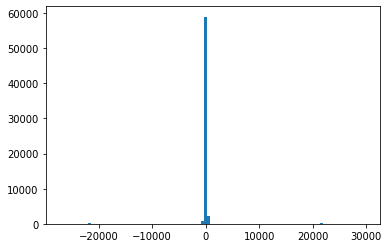

In [155]:
plt.hist(a.astype('int').reshape(-1)-b.astype('int').reshape(-1),100)


In [426]:
d = cv2.imread('/Users/rsingh/Oyla/Data/RHouse_RH_February_07_18_54_22/oyla_output_PhaseAmpl_fs_ergb_cds/phase_ampl_png//oyla_0747.png',cv2.IMREAD_UNCHANGED)

In [456]:
#e = cv2.imread('/Users/rsingh/Oyla/Data/RHouse_RH_February_07_18_54_22/oyla_output_PhaseAmpl_fs_ergb_cds/decoded_png_phase_ampl_ffmpeg//oyla_0747.png',cv2.IMREAD_UNCHANGED)
h,s,v = cv2.split(cv2.cvtColor(d,cv2.COLOR_BGR2RGB))
decoded_phase = np.zeros_like(h,dtype=np.uint16)
decoded_ampl = np.zeros_like(s,dtype=np.uint16)
for i in range(h.shape[0]):
    for j in range(h.shape[1]):
        #B[i,j] = format(h[i,j],'08b')[::-1]
        #A[i,j] = format(s[i,j],'08b')[::-1]
        #C[i,j] = format(v[i,j],'08b')
        c = format(v[i,j],'08b')[::-1]+format(h[i,j],'08b')[::-1]+format(s[i,j],'08b')
        decoded_phase[i,j] = int(c[:15][::-1],2)
        decoded_ampl[i,j] = int(c[15:],2)
        #print(h[i,j],s[i,j],v[i,j],c)
        #a = format(filtered_phase[i,j].astype('uint16'), '015b')[::-1]+format(_thresholded_ampl[i,j].astype('uint16'), '09b')

        #print(B[i,j],A[i,j],C[i,j],a)

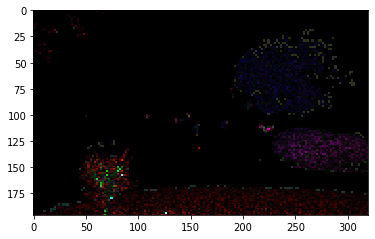

In [457]:
plt.imshow(np.abs(d.astype('int')-e.astype('int')))

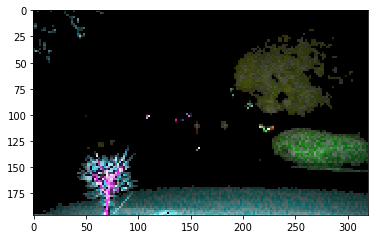

In [458]:
plt.imshow(e)

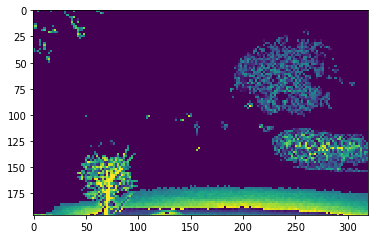

In [459]:
plt.imshow(decoded_phase)

In [185]:
c = cv2.imread('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47/oyla_output_PhaseAmpl_fs_cds/image.yuv')

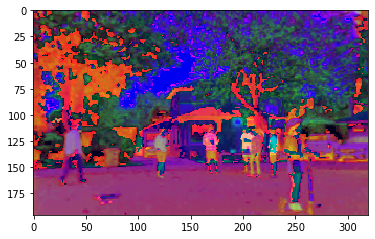

In [190]:
plt.imshow(cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV_FULL))

In [194]:
h,s,v = cv2.split(cv2.cvtColor(rgb,cv2.COLOR_RGB2HSV_FULL))

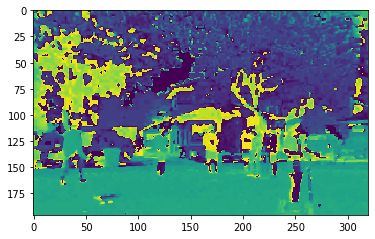

In [199]:
plt.imshow(h)

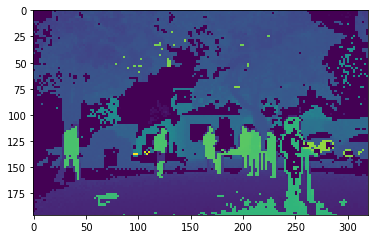

In [200]:
plt.imshow(B)

for k in range(1000):
    dec_bgr3 = cv2.imread('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47//oyla_output_PhaseAmpl_fs_cds/phase_ampl_png/oyla_'+str(k).zfill(4)+'.png',cv2.IMREAD_UNCHANGED)
    dec_hsv3 = cv2.cvtColor(dec_bgr3,cv2.COLOR_BGR2HSV)
    h,s,v = cv2.split(dec_hsv3)
    decoded_phase3 = np.zeros_like(h,dtype=np.uint16)
    decoded_ampl3 = np.zeros_like(s,dtype=np.uint16)
    for i in range(h.shape[0]):
        for j in range(h.shape[1]):
            #B[i,j] = format(h[i,j],'08b')[::-1]
            #A[i,j] = format(s[i,j],'08b')[::-1]
            #C[i,j] = format(v[i,j],'08b')
            c = format(s[i,j],'08b')[::-1]+format(h[i,j],'08b')[::-1]+format(v[i,j],'08b')
            decoded_phase3[i,j] = int(c[:15][::-1],2)
            decoded_ampl3[i,j] = int(c[15:],2)
            #print(h[i,j],s[i,j],v[i,j],c)
            #a = format(filtered_phase[i,j].astype('uint16'), '015b')[::-1]+format(_thresholded_ampl[i,j].astype('uint16'), '09b')

            #print(B[i,j],A[i,j],C[i,j],a)
    cv2.imwrite('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47//oyla_output_PhaseAmpl_fs_cds/phase_ampl_png/dec/oyla_'+str(k).zfill(4)+'.png',decoded_phase3.astype('uint16'))

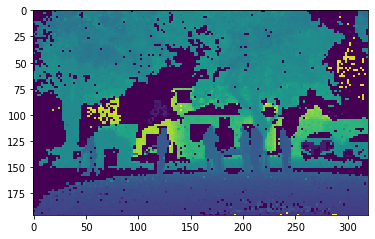

In [177]:
plt.imshow(decoded_phase3)

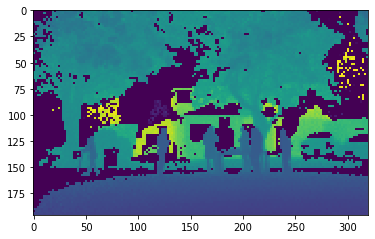

In [235]:
plt.imshow(filtered_phase)

In [204]:
decoded_rgb1 = cv2.imread('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47//oyla_output_PhaseAmpl_fs_cds/decoded_pngrgb100/oyla_0171.png',cv2.IMREAD_UNCHANGED)
decoded_rgb25 = cv2.imread('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47//oyla_output_PhaseAmpl_fs_cds/decoded_pngrgb50/oyla_0171.png',cv2.IMREAD_UNCHANGED)

29.325833890545216

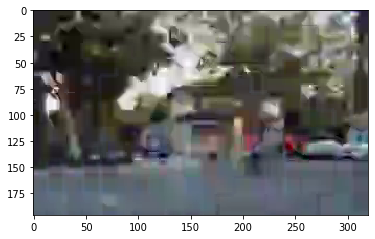

In [207]:
plt.imshow(cv2.cvtColor(decoded_rgb25,cv2.COLOR_BGR2RGB))
np.mean((rgb.astype('float')-decoded_rgb25.astype('float'))**2)**0.5

In [228]:
decoded_phase2 = cv2.imread('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47//oyla_output_PhaseAmpl_fs_cds/decoded_phase_png1/oyla_0171.png',cv2.IMREAD_UNCHANGED)

dtype('uint16')

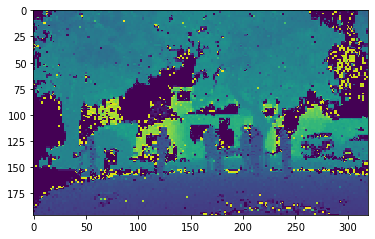

In [229]:
plt.imshow(decoded_phase2)
decoded_phase2.dtype

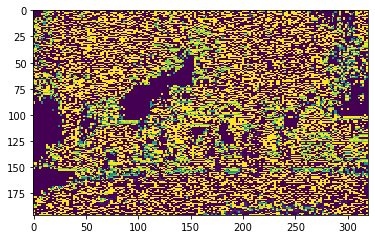

In [231]:
plt.imshow(decoded_phase-decoded_phase2)

([array([16672.,  4552.,  8256.,  4326., 20848.,  3634.,  2472.,   948.,
           928.,    84.]),
  array([17526.,  4216.,  8112.,  4470., 20512.,  3626.,  2296.,   920.,
           904.,   138.]),
  array([12768.,  5258.,  8295.,  4496., 22079.,  3790.,  2088.,  1147.,
          1023.,  1776.])],
 array([    0. ,  3276.7,  6553.4,  9830.1, 13106.8, 16383.5, 19660.2,
        22936.9, 26213.6, 29490.3, 32767. ], dtype=float32),
 <a list of 3 Lists of Patches objects>)

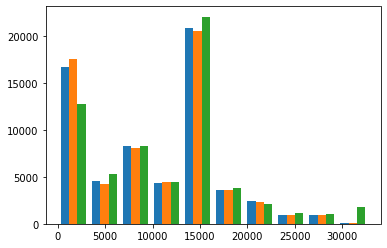

In [232]:
plt.hist(np.vstack((filtered_phase.reshape(-1),decoded_phase.reshape(-1),decoded_phase2.reshape(-1))).T)

In [36]:
print(decoded_phase[np.where(decoded_phase!=filtered_phase.astype('uint16'))])
print(filtered_phase[np.where(decoded_phase!=filtered_phase.astype('uint16'))])

[13427 13427 13291 ...  5478  5267  5267]
[13426. 13426. 13287. ...  5477.  5266.  5266.]


In [37]:
np.argmax(filtered_phase)

23020

In [38]:
decoded_phase[np.unravel_index(23020,decoded_phase.shape)]

30725

In [39]:
plt.imshow(decoded_ampl)
print(np.max(decoded_ampl))

511


#here we compressed the dist_ampl_png files using ffmpeg and then compressing stream
#ffmpeg because cv2 does not support quality
rate =[7605.28,  6767.63, 5458.86, 4232.53,3052.51, 1948.87, 1028.42, 446.23, 172.95,74.09, 27.77]
psnr=[56.033034,53.763549,49.909060,45.429744,40.710076,35.895806, 31.364510,27.715709,24.991512,22.885658,21.625408]
qp=[2,5,10,15,20,25,30,35,40,45,50]
plt.plot(np.asarray(psnr)/psnr[0],np.asarray(rate)/rate[0],'.')
plt.grid('on')

plt.plot(qp,psnr,'.')

In [43]:
D = thresholded_ampl.copy()
D[D>255]=255
plt.imshow(D.astype('uint8'))

In [201]:
os.stat('/Users/rsingh/Downloads/RGBDtrackercode/')

os.stat_result(st_mode=16877, st_ino=18672923, st_dev=16777220, st_nlink=19, st_uid=502, st_gid=20, st_size=608, st_atime=1594645048, st_mtime=1594029964, st_ctime=1594029964)

In [45]:
#A = cv2.imread('/Users/rsingh/Downloads/71.png',cv2.IMREAD_UNCHANGED)
#A = rgb[:,:,0]
#A[filtered_phase==0]=0
#A = filtered_phase
B = thresholded_ampl
def rate_distortion(A,B=None):
    qp=[256,128,64,32,16,8,4,2,1]
    distortion = []
    rate = []
    distortionB = []
    rateB = []
    for q in qp:
#         __A = np.zeros_like(A,dtype=np.uint16)
#         if B is not None:
#             __B = np.zeros_like(B,dtype=np.uint16)
#         for i in range(A.shape[0]):
#             for j in range(A.shape[1]):
#                 #a = format(A[i,j].astype('uint16'), '016b')
#                 #_A[i,j] = int(a[:10]+'000000',2)
#                 b = A[i,j]/q
#                 __A[i,j] = np.uint16(b)*q
#                 if B is not None:
#                     c = B[i,j]/q
#                     __B[i,j] = np.uint16(c)*q
        __A = np.uint16(A.astype('float32')/q)*q
        if B is not None:
            __B = np.uint16(B.astype('float32')/q)*q
        distortion.append(np.mean((__A.astype('float32')-A.astype('float32'))**2)**0.5)
        cv2.imwrite('/Users/rsingh/Downloads/t.png',__A.astype('uint16'))
        rate.append(os.stat('/Users/rsingh/Downloads/t.png').st_size/(1024 ))
        #print(distortion,rate)
        if B is not None:
            distortionB.append(np.mean((__B.astype('float32')-B.astype('float32'))**2)**0.5)
            cv2.imwrite('/Users/rsingh/Downloads/t.png',__B.astype('uint16'))
            rateB.append(os.stat('/Users/rsingh/Downloads/t.png').st_size/(1024 ))
    if B is not None:
        return distortion, rate, distortionB, rateB
    return distortion, rate

In [71]:
A = filtered_phase
B = thresholded_ampl
distortionD,rateD,distortionA,rateA = rate_distortion(A,B) 
A = rgb[:,:,0].copy()
distortionRR,rateRR = rate_distortion(A)
A[filtered_phase==0]=0
distortionRM,rateRM = rate_distortion(A)

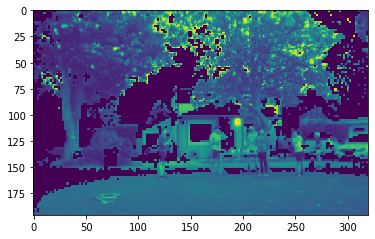

In [72]:
plt.imshow(A)

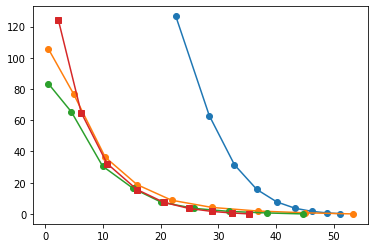

In [74]:
plt.plot(rateD,distortionD,'-o')
#plt.plot(rate,distortion,'-o')
plt.plot(rateRR,distortionRR,'-o')
plt.plot(rateRM,distortionRM,'-o')
plt.plot(rateA,distortionA,'-s')

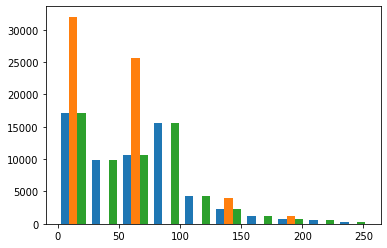

In [314]:
_=plt.hist(np.vstack((A.reshape(-1),_A.reshape(-1),__A.reshape(-1))).T,10)

In [51]:
distortionD

[126.61082410777524,
 63.01123334250608,
 31.442517344714247,
 15.654864038579392,
 7.672189243818791,
 3.624917259587449,
 1.6331933412439028,
 0.656578004700264,
 0.18036502111236585]

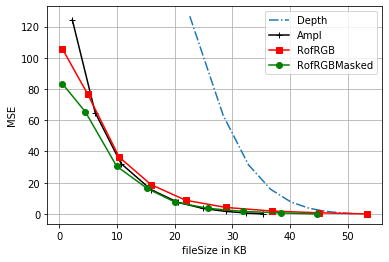

In [97]:
plt.plot(rateD,distortionD,'-.')
plt.plot(rateA,distortionA,'k-+')
plt.plot(rateRR,distortionRR,'r-s')
plt.plot(rateRM,distortionRM,'g-o')


plt.xlabel('fileSize in KB')
plt.ylabel('MSE')
plt.grid('on')
plt.legend(['Depth','Ampl','RofRGB','RofRGBMasked'])

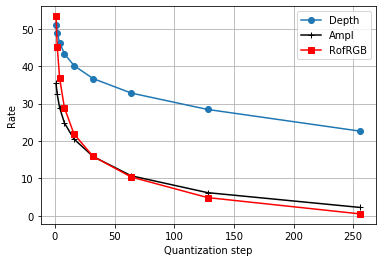

In [93]:
qp=[256,128,64,32,16,8,4,2,1]
plt.plot(qp,rateD,'-o')
plt.plot(qp,rateA,'k-+')
plt.plot(qp,rateRR,'r-s')

plt.xlabel('Quantization step')
plt.ylabel('Rate')
plt.legend(['Depth','Ampl','RofRGB'])
plt.grid('on')

In [222]:
#executed this in docker where there is ffmpeg
qp = [1,5,10,15,20,25,30,35,40,45,50] 
# for q in qp: 
#     ...:     os.system('ffmpeg  -i phase_ampl_png/oyla_%04d.png -c:v libx264   -crf '+str(q)+' -pix_fmt yuv420p da'+str(q)+'.mp4') 
#     ...:     rate.append(os.stat('da'+str(q)+'.mp4').st_size) 
#     ...:     out = subprocess.Popen(['ffmpeg','-i', 'da1.mp4' ,'-i', 'da'+str(q)+'.mp4', '-lavfi',  'ssim;[0:v][1:v]psnr', '-f', 'null', '-'],stdout=subprocess.PIPE,  stderr=subp
#     ...: rocess.STDOUT)  
#     ...:     st1, st2 = out.communicate() 
#     ...:     dist.append(str(st1).split(' ')[-3].split(':')[1]) 
#     ...:     print(dist)

In [223]:
rate = [45713507,
 38368734,
 29696752,
 21336707,
 13403394,
 7034014,
 2729931,
 863217,
 290372,
 99475,
 56178]
snr=[np.inf,
 48.42826,
 44.701311,
 40.103924,
 35.206308,
 30.805487,
 26.975533,
 24.500884,
 22.318898,
 20.913794,
 20.081235]

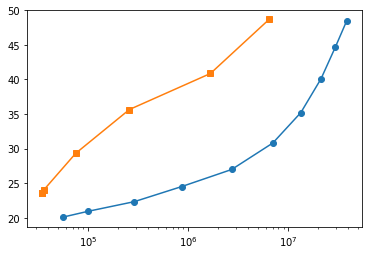

In [227]:
plt.semilogx(rate,snr,'-o')
plt.semilogx(rateR,distR,'-s')

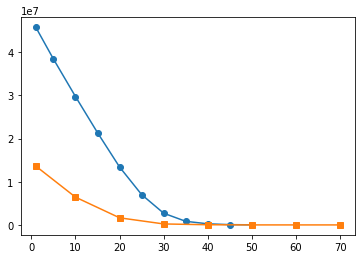

In [225]:
plt.plot(qp,rate,'-o')
plt.plot(qpR,rateR,'-s')

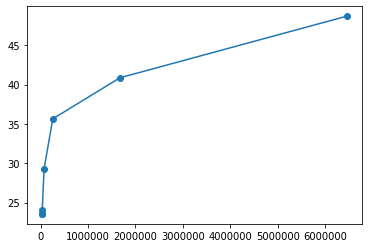

In [219]:
rateR =  [13629591, 6449064, 1674656, 259187, 75400, 36214, 34818, 34818]
distR = [np.inf,
 48.687758,
 40.868018,
 35.650934,
 29.317189,
 24.031073,
 23.565606,
 23.565606]
plt.plot(rateR,distR,'-o')

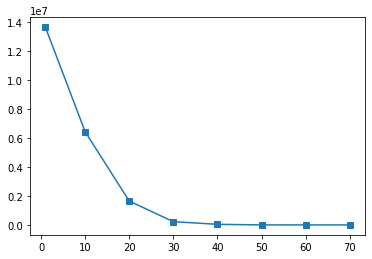

In [220]:
qpR = [1,10,20,30,40,50,60,70] 
plt.plot(qpR,rateR,'-s')

In [36]:
c = format(231,'08b')[::-1]+format(51,'08b')[::-1]+format(51,'08b')
print(c)

111001111100110000110011


20 146 219 010010010010100011011011


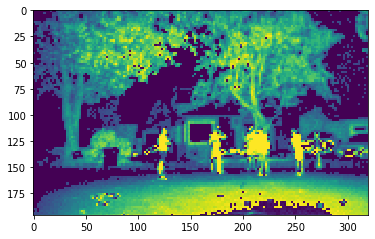

In [26]:
plt.imshow(amp)

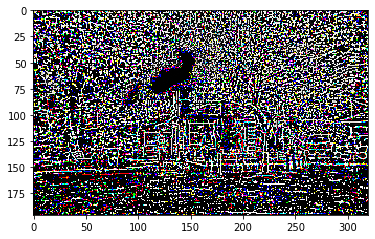

In [236]:
plt.imshow(_rgb-rgb)

In [174]:
D = cv2.imread('/Users/rsingh/Downloads/71.png',cv2.IMREAD_UNCHANGED)

In [175]:
E = cv2.imread('/Users/rsingh/Downloads/img-000071.jpg')

In [180]:
F = cv2.imread('/Users/rsingh/Packages/toolbox_nyu_depth_v2/d-1294886893.995873-661829243.pgm',cv2.IMREAD_UNCHANGED)

In [188]:
plt.hist(F.reshape(-1))
_F = cv2.resize(F,A.shape)

In [190]:
A[A==0] = np.mean(A[A>0])

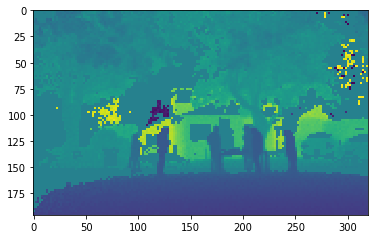

In [192]:
plt.imshow(A)

In [161]:
scipy.io.savemat('/Users/rsingh/Downloads/test.mat',{'d':A},do_compression=True)
scipy.io.savemat('/Users/rsingh/Downloads/test2.mat',{'d':_rgb},do_compression=True)

In [146]:
help(cv2.medianBlur)

Help on built-in function medianBlur:

medianBlur(...)
    medianBlur(src, ksize[, dst]) -> dst
    .   @brief Blurs an image using the median filter.
    .   
    .   The function smoothes an image using the median filter with the \f$\texttt{ksize} \times
    .   \texttt{ksize}\f$ aperture. Each channel of a multi-channel image is processed independently.
    .   In-place operation is supported.
    .   
    .   @note The median filter uses #BORDER_REPLICATE internally to cope with border pixels, see #BorderTypes
    .   
    .   @param src input 1-, 3-, or 4-channel image; when ksize is 3 or 5, the image depth should be
    .   CV_8U, CV_16U, or CV_32F, for larger aperture sizes, it can only be CV_8U.
    .   @param dst destination array of the same size and type as src.
    .   @param ksize aperture linear size; it must be odd and greater than 1, for example: 3, 5, 7 ...
    .   @sa  bilateralFilter, blur, boxFilter, GaussianBlur



In [132]:
np.mean(np.abs(distcv2Read-dist))

0.0

In [133]:
cv2.imwrite('/Users/rsingh/Downloads/testCV232F.png',dist)

True

In [136]:
distcv2Read = cv2.imread('/Users/rsingh/Downloads/testCV232F.png',cv2.IMREAD_UNCHANGED)
print(np.mean(np.abs(distcv2Read-dist)))
print(distcv2Read.dtype)

793.4271
uint8


In [178]:
scipy.io.savemat('/Users/rsingh/Downloads/test.mat',{'d':dist},do_compression=True)

In [138]:
from PIL import Image

In [140]:
_d = Image.fromarray(distcm32)

In [141]:
_d.save('/Users/rsingh/Downloads/testPIL.png',mode='I')

In [142]:
__d = cv2.imread('/Users/rsingh/Downloads/testPIL.png',cv2.IMREAD_UNCHANGED)

In [148]:
np.mean(np.abs(__d-distcm32))

1875014589.829209

In [150]:
__d = Image.open('/Users/rsingh/Downloads/testPIL.png')

In [151]:
np.array(__d).dtype

dtype('int32')

In [152]:
np.mean(np.abs(__d-distcm32))

61853.07691326531

In [154]:
np.array(__d)

array([[    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       [    0,     0,     0, ...,     0,     0,     0],
       ...,
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535],
       [65535, 65535, 65535, ..., 65535, 65535, 65535]], dtype=int32)

In [167]:
B = cv2.imread('/Users/rsingh/71.png',cv2.IMREAD_UNCHANGED)
B.dtype

dtype('uint16')

In [169]:
B

array([[19504, 19504, 19504, ..., 24392, 24392, 24392],
       [19504, 19504, 19504, ..., 24392, 24392, 24392],
       [19504, 19504, 19504, ..., 24392, 24392, 24392],
       ...,
       [14464, 14464, 14464, ...,  7816,  7816,  7816],
       [14464, 14464, 14464, ...,  7736,  7736,  7816],
       [14464, 14464, 14464, ...,  7816,  7816,  7816]], dtype=uint16)

In [156]:
skimage.io.imsave('/Users/rsingh/Downloads/testskimage.png',distcm32)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: /Users/rsingh/Downloads/testskimage.png is a low contrast image
  """Entry point for launching an IPython kernel.
Lossy conversion from uint32 to uint8. Losing 24 bits of resolution. Convert image to uint8 prior to saving to suppress this warning.


In [33]:
_r = np.squeeze(_rgb[:,:,0])[np.where(_filtered_phase>0)]
_g = np.squeeze(_rgb[:,:,1])[np.where(_filtered_phase>0)]
_b = np.squeeze(_rgb[:,:,2])[np.where(_filtered_phase>0)]

(-0.5, 285.5, 199.5, -0.5)

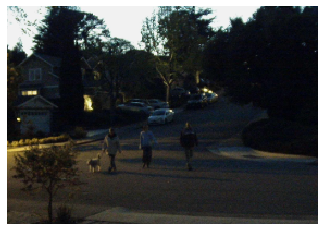

In [16]:
plt.imshow(_rgb)
plt.axis('off')

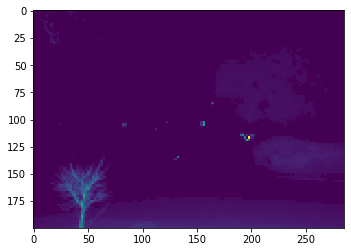

In [53]:
raw_ampl[raw_ampl>65000]=0
plt.imshow(raw_ampl)

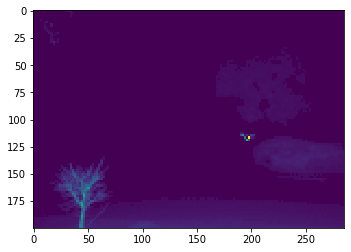

In [54]:
plt.imshow(thresholded_ampl)

In [55]:
print(np.count_nonzero(thresholded_ampl),np.count_nonzero(raw_ampl),np.count_nonzero(filtered_phase),np.count_nonzero(raw_phase))

14265 15440 14265 57200


(0,)


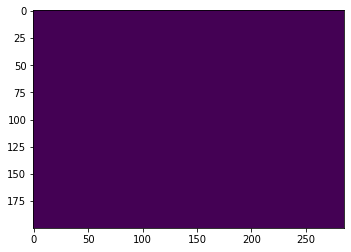

In [56]:
ind = np.where(np.logical_and(thresholded_ampl==0,filtered_phase!=0))
Z = 0*filtered_phase
Z[ind] = 1
print(ind[0].shape)
plt.imshow(Z)

(1175,)


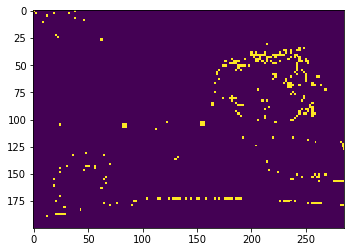

In [57]:
ind = np.where(np.logical_and(thresholded_ampl==0,raw_ampl!=0))
Z = 0*filtered_phase
Z[ind] = 1
print(ind[0].shape)
plt.imshow(Z)

(1175,)


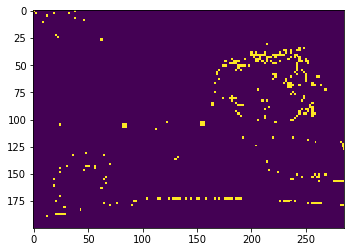

In [58]:
ind = np.where(np.logical_and(filtered_phase==0,raw_ampl!=0))
Z = 0*filtered_phase
Z[ind] = 1
print(ind[0].shape)
plt.imshow(Z)

In [12]:
features = np.hstack((np.asarray(pcd.points),_r[:,np.newaxis],_g[:,np.newaxis],_b[:,np.newaxis]))
with open('xyz_rgb.txt','w') as fp:
    for f in features:
        fp.write(str(f[0])+' '+str(f[1])+' '+str(f[2])+' '+str(f[3])+' '+str(f[4])+' '+str(f[5])+'\n')

In [13]:
pwd

'/Users/rsingh/Oyla/Work/our_python_dev/Testing_Raghav'

In [14]:
pcd2 = o3d.io.read_point_cloud('xyz_rgb.txt',format='xyzrgb')

In [17]:
np.asarray(pcd2)

array(geometry::PointCloud with 14175 points., dtype=object)

In [24]:
o3d.visualization.draw_geometries([pcd])

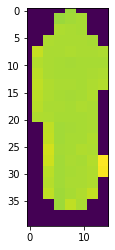

In [23]:
plt.imshow(filtered_phase[108:148,145:160])

In [108]:
threshold = 0.02
# trans_init = np.asarray([[0.862, 0.011, -0.507, 0.5],
#                          [-0.139, 0.967, -0.215, 0.7],
#                          [0.487, 0.255, 0.835, -1.4],
#                          [0.0, 0.0, 0.0, 1.0]])
trans_init = np.asarray([[1,0,0,0],[0,1,0,0],[0,0,1,0],[0,0,0,1]])

In [93]:
import copy
def draw_registration_result(source, target, transformation):
    source_temp = copy.deepcopy(source)
    target_temp = copy.deepcopy(target)
    source_temp.paint_uniform_color([1, 0.706, 0])
    target_temp.paint_uniform_color([0, 0.651, 0.929])
    source_temp.transform(transformation)
    o3d.visualization.draw_geometries([source_temp, target_temp])

In [109]:
draw_registration_result(pcd, pcd_f, trans_init)


In [95]:
print("Initial alignment")
evaluation = o3d.registration.evaluate_registration(pcd, pcd_f, threshold, trans_init)
print(evaluation)

Initial alignment
registration::RegistrationResult with fitness=1.721589e-02, inlier_rmse=0.000000e+00, and correspondence_set size of 652
Access transformation to get result.


In [102]:
reg_p2p = o3d.registration.registration_icp(
        pcd, pcd_f, threshold, trans_init,
        o3d.registration.TransformationEstimationPointToPoint(),
        o3d.registration.ICPConvergenceCriteria(max_iteration = 2000))
print(reg_p2p)
print("Transformation is:")
print(reg_p2p.transformation)

registration::RegistrationResult with fitness=1.721589e-02, inlier_rmse=4.627217e-13, and correspondence_set size of 652
Access transformation to get result.
Transformation is:
[[ 1.00000000e+00 -4.16333634e-17  0.00000000e+00 -2.44666221e-14]
 [-2.77555756e-17  1.00000000e+00 -5.37764278e-17  5.63684915e-14]
 [ 1.11022302e-16  1.73472348e-18  1.00000000e+00 -9.09494702e-13]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


In [103]:
draw_registration_result(pcd, pcd_f, reg_p2p.transformation)


In [97]:
def preprocess_point_cloud(pcd, voxel_size):
    print(":: Downsample with a voxel size %.3f." % voxel_size)
    pcd_down = pcd.voxel_down_sample(voxel_size)

    radius_normal = voxel_size * 2
    print(":: Estimate normal with search radius %.3f." % radius_normal)
    pcd_down.estimate_normals(
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_normal, max_nn=30))

    radius_feature = voxel_size * 5
    print(":: Compute FPFH feature with search radius %.3f." % radius_feature)
    pcd_fpfh = o3d.registration.compute_fpfh_feature(
        pcd_down,
        o3d.geometry.KDTreeSearchParamHybrid(radius=radius_feature, max_nn=100))
    return pcd_down, pcd_fpfh

In [98]:
voxel_size = 0.05 # means 5cm for this dataset

source_down, source_fpfh = preprocess_point_cloud(pcd, voxel_size)
target_down, target_fpfh = preprocess_point_cloud(pcd_f, voxel_size)

:: Downsample with a voxel size 0.050.
:: Estimate normal with search radius 0.100.
:: Compute FPFH feature with search radius 0.250.
:: Downsample with a voxel size 0.050.
:: Estimate normal with search radius 0.100.
:: Compute FPFH feature with search radius 0.250.


In [99]:
def execute_global_registration(source_down, target_down, source_fpfh,
                                target_fpfh, voxel_size):
    distance_threshold = voxel_size * 1.5
    print(":: RANSAC registration on downsampled point clouds.")
    print("   Since the downsampling voxel size is %.3f," % voxel_size)
    print("   we use a liberal distance threshold %.3f." % distance_threshold)
    result = o3d.registration.registration_ransac_based_on_feature_matching(
        source_down, target_down, source_fpfh, target_fpfh, distance_threshold,
        o3d.registration.TransformationEstimationPointToPoint(False), 4, [
            o3d.registration.CorrespondenceCheckerBasedOnEdgeLength(0.9),
            o3d.registration.CorrespondenceCheckerBasedOnDistance(
                distance_threshold)
        ], o3d.registration.RANSACConvergenceCriteria(4000000, 500))
    return result

In [100]:
result_ransac = execute_global_registration(source_down, target_down,
                                            source_fpfh, target_fpfh,
                                            voxel_size)
print(result_ransac)
draw_registration_result(source_down, target_down, result_ransac.transformation)

:: RANSAC registration on downsampled point clouds.
   Since the downsampling voxel size is 0.050,
   we use a liberal distance threshold 0.075.
registration::RegistrationResult with fitness=0.000000e+00, inlier_rmse=0.000000e+00, and correspondence_set size of 0
Access transformation to get result.


In [101]:
result_ransac.transformation

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

theta = np.radians(90)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, -s, 0), (s, c,0),(0,0,1)))
pcd.rotate(R)
o3d.visualization.draw_geometries([pcd])

theta = np.radians(35.26)
c, s = np.cos(theta), np.sin(theta)
R = np.array(((c, 0, -s), (s, 0,c),(0,1,0)))
pcd.rotate(R)

o3d.visualization.draw_geometries([pcd])

R

R = 1/np.sqrt(6)*np.asarray([[np.sqrt(3),0, -np.sqrt(3)],[1,2,1],[np.sqrt(2),-np.sqrt(2),np.sqrt(2)]])
print(R,np.dot(R,np.asarray([0,0,np.sqrt(2)])))

In [19]:
cmap = plt.get_cmap("tab20")

In [20]:
labels = np.array(pcd.cluster_dbscan(eps=100, min_points=10, print_progress=True))
max_label = labels.max()
print("has %d clusters" % (max_label + 1))

colors = cmap(labels / (max_label if max_label > 0 else 1))
colors[labels <0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

has 19 clusters


In [21]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18], dtype=int32),
 array([  84,  724,   30,   47,   91, 2049,  720,   11,   12,   22,   13,
          15,   13,   36,   22,   16,   26, 1723, 8488,   33]))

In [24]:
labels = np.array(pcd2.cluster_dbscan(eps=100, min_points=10, print_progress=True))
max_label = labels.max()
print("has %d clusters" % (max_label + 1))

colors = cmap(labels / (max_label if max_label > 0 else 1))
colors[labels <0] = 0
pcd2.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd2])

has 19 clusters


In [23]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18], dtype=int32),
 array([  84,  724,   30,   47,   91, 2049,  720,   11,   12,   22,   13,
          15,   13,   36,   22,   16,   26, 1723, 8488,   33]))

In [15]:
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

In [136]:
features = np.asarray(pcd.points)
X = features

In [165]:
np.std(X,axis=0)

array([1.0000126, 0.9999987, 1.0000182], dtype=float32)

In [27]:
features = np.hstack((np.asarray(pcd.points),_r[:,np.newaxis],_g[:,np.newaxis],_b[:,np.newaxis]))
X = features

In [13]:
features = np.hstack((_r[:,np.newaxis],_g[:,np.newaxis],_b[:,np.newaxis]))
X = features

In [28]:
X = StandardScaler().fit_transform(features)

In [53]:
db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_


In [54]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)


Estimated number of clusters: 22
Estimated number of noise points: 544


In [55]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19, 20, 21]),
 array([ 544,  620,   30,   46,   79, 1226,   42,  667,   75,   12,  164,
          14,   41,  458,   16,   13,   36,  920,  746, 8314,   55,   21,
          36]))

In [56]:
max_label = labels.max()
print("has %d clusters" % (max_label + 1))

colors = cmap(labels / (max_label if max_label > 0 else 1))
colors[labels <0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

has 22 clusters


In [112]:
from skimage.segmentation import felzenszwalb

178


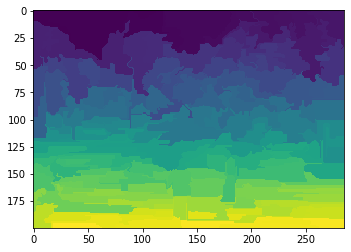

In [119]:
_fez = felzenszwalb(_rgb,scale=2, sigma=1.0, min_size=70)
print(np.max(np.unique(_fez)))
plt.imshow((_fez))

In [27]:
np.max(filtered_phase)

29999.0

In [52]:
edges = cv2.cornerHarris(_filtered_phase,2,3,4)


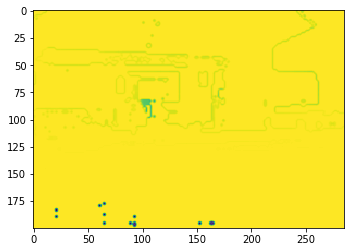

In [53]:
plt.imshow(edges)

(array([1.3000e+01, 6.0000e+00, 8.0000e+00, 3.8000e+01, 2.0000e+00,
        1.0000e+00, 4.8000e+01, 6.3000e+01, 1.0900e+02, 5.6912e+04]),
 array([-4.7460938 , -4.2714844 , -3.796875  , -3.3222656 , -2.8476562 ,
        -2.3730469 , -1.8984375 , -1.4238281 , -0.94921875, -0.47460938,
         0.        ], dtype=float32),
 <a list of 10 Patch objects>)

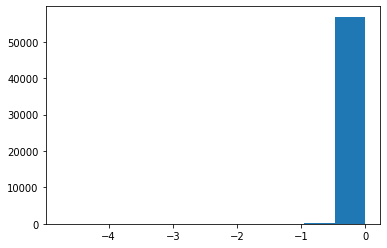

In [55]:
plt.hist(edges.reshape(-1))

In [56]:
dst = cv2.dilate(edges,None)


In [31]:
help(cv2.cornerHarris)

Help on built-in function cornerHarris:

cornerHarris(...)
    cornerHarris(src, blockSize, ksize, k[, dst[, borderType]]) -> dst
    .   @brief Harris corner detector.
    .   
    .   The function runs the Harris corner detector on the image. Similarly to cornerMinEigenVal and
    .   cornerEigenValsAndVecs , for each pixel \f$(x, y)\f$ it calculates a \f$2\times2\f$ gradient covariance
    .   matrix \f$M^{(x,y)}\f$ over a \f$\texttt{blockSize} \times \texttt{blockSize}\f$ neighborhood. Then, it
    .   computes the following characteristic:
    .   
    .   \f[\texttt{dst} (x,y) =  \mathrm{det} M^{(x,y)} - k  \cdot \left ( \mathrm{tr} M^{(x,y)} \right )^2\f]
    .   
    .   Corners in the image can be found as the local maxima of this response map.
    .   
    .   @param src Input single-channel 8-bit or floating-point image.
    .   @param dst Image to store the Harris detector responses. It has the type CV_32FC1 and the same
    .   size as src .
    .   @param blockSize Neighb

In [26]:
from sklearn.cluster import OPTICS, cluster_optics_dbscan


In [35]:
clust = OPTICS(min_samples=10, xi=.05, min_cluster_size=.05)


In [36]:
clust.fit(X)


OPTICS(algorithm='auto', cluster_method='xi', eps=None, leaf_size=30,
       max_eps=inf, metric='minkowski', metric_params=None,
       min_cluster_size=0.05, min_samples=10, n_jobs=None, p=2,
       predecessor_correction=True, xi=0.05)

In [32]:
labels_050 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=0.3)
labels_200 = cluster_optics_dbscan(reachability=clust.reachability_,
                                   core_distances=clust.core_distances_,
                                   ordering=clust.ordering_, eps=2)

In [34]:
np.unique(clust.labels_,return_counts=True)

(array([-1,  0,  1,  2]), array([  333, 10144,  2748,  4407]))

In [31]:
np.unique(labels_200,return_counts=True)

(array([-1,  0]), array([   30, 17602]))

In [38]:
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(linkage='single', n_clusters=10)
clustering.fit(X)

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='single', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [39]:
np.unique(clustering.labels_,return_counts=True)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([ 4444, 10144,    64,    28,  2748,     4,     4,     8,    12,
          176]))

In [42]:
clustering = AgglomerativeClustering(linkage='ward', n_clusters=10)
Y = clustering.fit(X)

In [41]:
from scipy.cluster.hierarchy import dendrogram

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)

In [44]:
Y.

AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
                        connectivity=None, distance_threshold=None,
                        linkage='ward', memory=None, n_clusters=10,
                        pooling_func='deprecated')

In [71]:
xyz = np.asarray(pcd.points)
ind1 = np.where(labels==9)
ind2 = np.where(labels==8)
np.sqrt(np.sum((np.mean(xyz[ind1,:],axis=1)-np.mean(xyz[ind2,:],axis=1))**2))

359.72904864333844

In [30]:
filter_params['guided_filter'] = 1
filter_params['guided_filter_std_range'] = 0.1

In [31]:
filter_params['median_filter'] = 1
filter_params['median_filter_size'] = 7
filter_params['median_filter_iterations'] = 1

In [53]:
filter_params['edge_detection'] = 1
filter_params['edge_detection_thresholds'] = 100

In [20]:
filter_params['pcl_median_filter'] = 1

In [194]:
filter_params['pcl_weighted_average_filter'] = 1

In [238]:
filter_params['pcl_outliers_filter'] = 1

In [28]:
filtered_phase, thresholded_ampl, indices = threshold_filter(raw_phase = raw_phase, raw_ampl = raw_ampl, reflectivity_thresh= reflectivity_thresh,
                                                                             range_max = range_max, range_min = range_min, ampl_min = ampl_min,
                                                                             filter_params = filter_params, ambiguity_distance = ambiguity_distance)

Doing median filtering


(-0.5, 276.5, 201.5, -0.5)

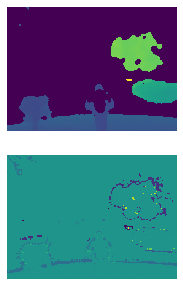

In [55]:
f, axs = plt.subplots(2,1,figsize=(5,5))
axs[0].imshow((filtered_phase))
axs[0].axis('off')
axs[1].imshow((filtered_phase)-(_raw_phase))
axs[1].axis('off')

(-0.5, 276.5, 201.5, -0.5)

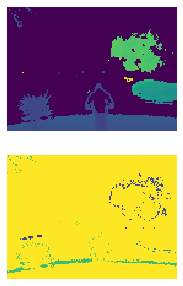

In [16]:
f, axs = plt.subplots(2,1,figsize=(5,5))
axs[0].imshow((filtered_phase))
axs[0].axis('off')
axs[1].imshow((filtered_phase)-(_raw_phase))
axs[1].axis('off')

In [19]:
no_filtered_phase = filtered_phase.copy()

In [25]:
pcl_median_phase = filtered_phase.copy()

In [33]:
print(np.where(pcl_median_phase>0)[0].shape,np.where(no_filtered_phase>0)[0].shape,np.where(filtered_phase>0)[0].shape)

(14852,) (14852,) (14609,)


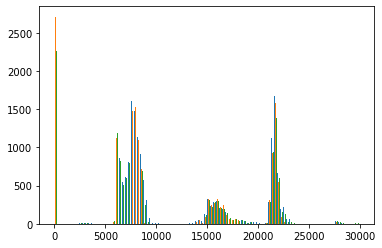

In [29]:
_=plt.hist(np.vstack((_raw_phase[_raw_phase>0],filtered_phase[_raw_phase>0],no_filtered_phase[_raw_phase>0])).transpose(),100)


29956


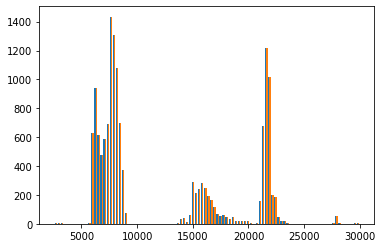

In [18]:
_=plt.hist(np.vstack((_raw_phase[filtered_phase>0],filtered_phase[filtered_phase>0])).transpose(),100)
print(np.max(raw_phase[filtered_phase>0]))

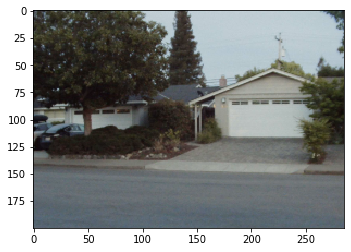

In [70]:
plt.imshow(_rgb)

207


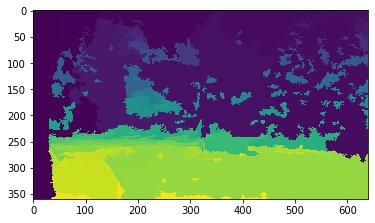

In [97]:
_fez = felzenszwalb(cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY),multichannel=False,min_size=50,sigma=0.5,scale=50)
print(np.max(np.unique(_fez)))
plt.imshow((_fez))

In [222]:
# print(np.count_nonzero(z<850))
# print(scipy.stats.skew(z))
# print(scipy.stats.kurtosis(z))
# print(np.mean(z))
# print(np.std(z))
# print(scipy.stats.kurtosis(z)-scipy.stats.skew(z)*scipy.stats.skew(z))

pcd_tree = o3d.geometry.KDTreeFlann(pcd)

In [115]:
pcd.paint_uniform_color([0.5, 0.5, 0.5])
cl, ind = pcd.remove_statistical_outlier(nb_neighbors=20,
                                                    std_ratio=1.0)
#cl, ind = voxel_down_pcd.remove_radius_outlier(nb_points=16, radius=0.05)
inlier_cloud = pcd.select_down_sample(ind)
inlier_cloud.paint_uniform_color([1,0,0])
outlier_cloud = pcd.select_down_sample(ind, invert=True)
print(outlier_cloud)


geometry::PointCloud with 270 points.


In [116]:
o3d.visualization.draw_geometries([inlier_cloud, outlier_cloud])

In [74]:
(ii,jj) =np.where(filtered_phase>0)
aa = thresholded_ampl[ii,jj]
dd = filtered_phase[ii,jj]
gray = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)[ii,jj]
features = (np.vstack((ii.astype('float32')/np.max(ii),jj.astype('float32')/np.max(jj),dd/np.max(dd))).transpose())
#features = np.vstack((ii,jj,gray)).transpose()
#features = aa.transpose()

features_w = whiten(features)

In [75]:
pcd = o3d.geometry.PointCloud()
pcd.points = o3d.utility.Vector3dVector(features)
o3d.visualization.draw_geometries([pcd])

In [102]:
print(np.std(rgb/255.0))
print(np.std(thresholded_ampl/np.max(thresholded_ampl)))
print(np.std(filtered_phase/np.max(filtered_phase)))

0.0806856948151428
0.041561535283216544
0.22707056


In [152]:
pcd.paint_uniform_color([0.5, 0.5, 0.5])
cl, ind = pcd.remove_statistical_outlier(nb_neighbors=20,
                                                    std_ratio=0.5)
#cl, ind = pcd.remove_radius_outlier(nb_points=20, radius=0.0005)
inlier_cloud = pcd.select_down_sample(ind)
inlier_cloud.paint_uniform_color([1,0,0])
outlier_cloud = pcd.select_down_sample(ind, invert=True)
o3d.visualization.draw_geometries([inlier_cloud,outlier_cloud])
print(inlier_cloud,outlier_cloud)

geometry::PointCloud with 11392 points. geometry::PointCloud with 2868 points.


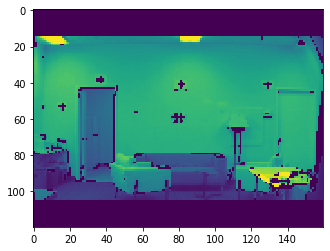

In [29]:
out = np.setdiff1d(np.arange(ii.shape[0]),ind)
gray[out] = 0
_gray = cv2.cvtColor(rgb,cv2.COLOR_RGB2GRAY)
_gray[ii,jj] = gray
plt.imshow(_gray)

In [14]:
pcd_tree = o3d.geometry.KDTreeFlann(pcd)

In [109]:
[k, idx, d] = pcd_tree.search_knn_vector_3d(pcd.points[1800], 200)

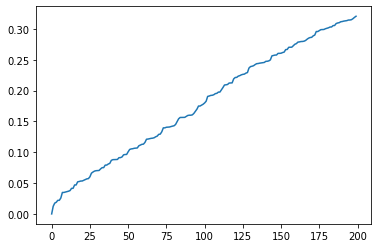

In [87]:
[k, idx, d] = pcd_tree.search_knn_vector_xd(pcd.points[1800], 200)
print(d,idx)

plt.plot(np.asarray(np.sqrt(d)))

In [24]:
import time
start = time.time()
ddd = np.zeros_like(dd)
for kk in range(57093):
    [k, idx, _] = pcd_tree.search_knn_vector_3d(pcd.points[kk], 200)
    ddd[kk] = np.median(dd[idx])
end = time.time()

In [25]:
print(end-start)

4.677545070648193


In [234]:
B = sklearn.neighbors.radius_neighbors_graph(features_w, 0.15,mode='distance',n_jobs=100)

In [257]:
_B= (-1*B.power(2)).expm1()
_B.data += 1
_B += scipy.sparse.eye(B.shape[0])
# __B = B.copy()
# __B.data = 1-__B.data
#__B = scipy.sparse.eye(B.shape[0])-__B

282.71830194960097
29.098376246845746


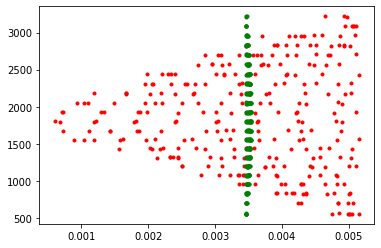

In [258]:
_b = scipy.sparse.find(_B[1800,:])
b = scipy.sparse.find(B[1800,:])
#__b = scipy.sparse.find(__B[1800,:])
#plt.plot((_b[2]),'b.')
plt.plot(b[2]/sum(b[2]),b[1],'r.')
plt.plot(_b[2]/sum(_b[2]),_b[1],'g.')
#plt.plot(np.expm1(-100*np.asarray(d))+1,'.')
print(sum(_b[2]))
print(sum(b[2]))

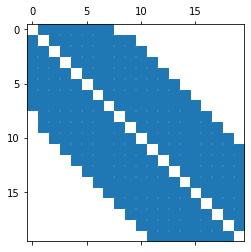

In [259]:
plt.spy(B[:20,:20])

In [260]:
from scipy.sparse import csgraph
#L = csgraph.laplacian(B,normed=True)
D = np.squeeze(np.asarray(np.sum(B,axis=1)))
D = 1/D
_D = np.squeeze(np.asarray(np.sum(_B,axis=1)))
_D = 1/_D

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.


In [261]:
iDn = scipy.sparse.coo_matrix(B.shape)
iDn.setdiag(D)

In [262]:
_iDn = scipy.sparse.coo_matrix(_B.shape)
_iDn.setdiag(_D)

W=np.asarray([[2,3],[3,2]])
v=np.asarray([1,1])
np.dot(W,v)

In [263]:
ddd = iDn.dot(B.dot(dd))
_ddd = _iDn.dot(_B.dot(dd))

ddd = iDn.dot((scipy.sparse.eye(L.shape[0])-L).dot(o))

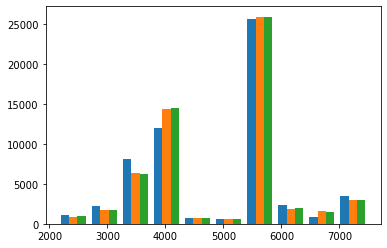

In [264]:
_=plt.hist(np.vstack((dd,ddd,_ddd)).transpose())


In [265]:
depth[np.where(ampl>=65000)] = 0

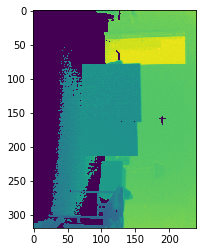

In [266]:
plt.imshow(depth)

In [267]:
depth2 = np.zeros_like(depth)
depth2[np.where(ampl<65000)] = ddd

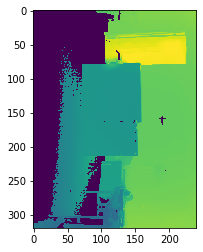

In [268]:
plt.imshow(depth2)

In [269]:
_depth2 = np.zeros_like(depth)
_depth2[np.where(ampl<65000)] = _ddd

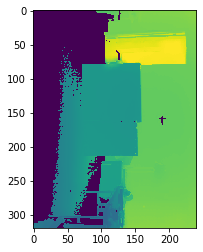

In [270]:
plt.imshow(_depth2)

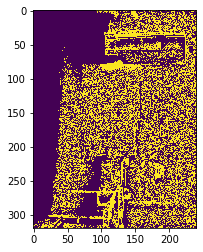

In [271]:
plt.imshow(np.abs(depth-_depth2))

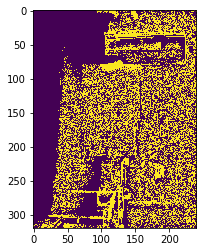

In [272]:
plt.imshow(depth-depth2)

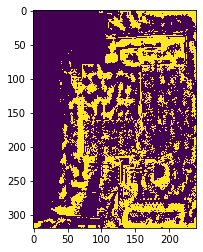

In [273]:
plt.imshow(depth2-_depth2)

In [186]:
depth3 = cv2.medianBlur(depth,3)

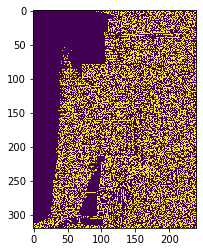

In [123]:
plt.imshow(depth3-depth)

In [41]:
C = []
mi = []
MA = []
mE = []
for k in range(106,506,5):
    pcd = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(k).zfill(4)+'.xyz',format='xyz')

    cmap = plt.get_cmap("tab20")

    labels = np.array(pcd.cluster_dbscan(eps=100, min_points=10, print_progress=True))
    xyz = np.asarray(pcd.points)
    max_label = labels.max()
    print("has %d clusters" % (max_label + 1))
    _,cnt=np.unique(labels,return_counts=True)

    print(cnt)
    C.append(cnt)
    A = np.c_[xyz,labels]
    _MA = []
    _mi = []
    _mE = []
    for l in np.unique(labels):
        _MA.extend(np.max(A[np.where(A[:,3]==l),:3],axis=1))
        _mi.extend(np.min(A[np.where(A[:,3]==l),:3],axis=1))
        _mE.extend(np.mean(A[np.where(A[:,3]==l),:3],axis=1))
    MA.append(_MA)
    mi.append(_mi)
    mE.append(_mE)
    #colors = cmap(labels / (max_label if max_label > 0 else 1))
    #colors[labels < 0] = 0
    #pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
    #o3d.visualization.draw_geometries([pcd])

has 9 clusters
[  38  128 7365   12 2929 2238   16   68   32 2333]
has 7 clusters
[  52  208 6523 2977 2331   16   68 2416]
has 8 clusters
[  49  184 2956 6053 2031   16   68 2442  268]
has 10 clusters
[  46  168 3160 5421  952   16   64 2502   16  708   12]
has 11 clusters
[  30  160 3196  880   16   64 2494   10   22   36 1584 4441]
has 11 clusters
[  43  156 3197 1252   16   64 2478   22   16 2460   16 4153]
has 9 clusters
[  32  152 3276  884   16   64 2518   16 2898 4017]
has 9 clusters
[  32  148 3386  772   16   64 2530   26 3068 3929]
has 7 clusters
[  20  144 3388  912   16   64 2546 7061]
has 7 clusters
[  22  144 3398  912   16   64 2556 7143]
has 8 clusters
[  40  152 3404 1136   16   64 2522   24 7131]
has 7 clusters
[  28  144 3496 8237   16   64 2534   16]
has 9 clusters
[  24  152 3468 1030   16   20   64 2550   16 7259]
has 7 clusters
[  34  148 3434 8285   16   16   64 2550]
has 8 clusters
[  15  148 3413 8295   16   16   64 2546   30]
has 7 clusters
[  28  144 3488 8

Text(0.5, 0, 'number of points')

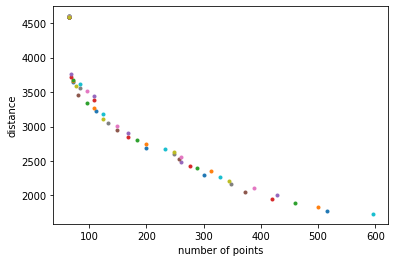

In [42]:
ind = -3
for i in range(15,len(C)):
    ind = np.where((C[i]<600) & (C[i]>50))[0][-1]
    plt.plot(C[i][ind],mE[i][ind][2],'.')
plt.ylabel('distance')
plt.xlabel('number of points')
#plt.savefig('/Users/rsingh/Downloads/dp2.png')

In [43]:

pcd = o3d.io.read_point_cloud(os.path.join(dir_path,'kitti/')+'/3d/oyla_'+str(806).zfill(4)+'.xyz',format='xyz')
labels = np.array(pcd.cluster_dbscan(eps=100, min_points=10, print_progress=True))


In [44]:
np.unique(labels,return_counts=True)

(array([-1,  0,  1,  2,  3,  4,  5,  6,  7], dtype=int32),
 array([  44,  164, 3724,   16,   20,   68,  240, 2590, 7969]))

In [45]:
colors = cmap(labels / (max_label if max_label > 0 else 1))
colors[labels ==5] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

# def queryKDTree(pcd, pcd_tree):
    l = len(np.asarray(pcd.points))
    xyz = np.zeros((l, 3))

    for i in range(l):
        [k, idx, _] = pcd_tree.search_knn_vector_3d(pcd.points[i], 100)
    #     if k==1:
    #         a = np.asarray(pcd.points)[idx[0],:]
    #         print(i)
    #     else:
    #         a = np.median(np.asarray(pcd.points)[idx[1:],:],axis=0)
        a = np.median(np.asarray(pcd.points)[idx[0:],:],axis=0)
        xyz[idx[0]:] = a
    return xyz

import time
start = time.time()
xyz = queryKDTree(pcd,pcd_tree)
end = time.time()
print(end-start)

opcd = o3d.geometry.PointCloud()
opcd.points = o3d.utility.Vector3dVector(xyz)

o3d.visualization.draw_geometries([pcd])

o3d.io.write_point_cloud('/Users/rsingh/Downloads/oyla_26.xyz',opcd)

def transformation_to_spherical(xyz,width,height,fov_angle,fov_angle_o):
    
    alfa0 = fov_angle * np.pi/ 360.0
    step_alpha = 2*alfa0/width;
    beta0 = fov_angle_o * np.pi/ 360.0;  
    step_beta = 2*beta0/height;
    
    xyz[:,0] = xyz[:,0]-width/2
    xyz[:,1] = xyz[:,1]-height/2
    r = np.sqrt(np.sum(np.power(xyz,2),axis=1))
    alpha = np.arctan(xyz[:,0]/xyz[:,2])
    beta = np.arcsin(xyz[:,1]/r)
    _alpha = np.zeros(2*alpha.shape[0])
    _alpha[1::2]=np.convolve(alpha,np.asarray([0.5,0.5]),mode='same')
    _alpha[0::2]=alpha
    _beta = np.zeros(2*beta.shape[0])
    _beta[1::2]=np.convolve(beta,np.asarray([0.5,0.5]),mode='same')
    _beta[0::2]=beta
    _r = np.zeros(2*r.shape[0])
    _r[1::2]=np.convolve(r,np.asarray([0.5,0.5]),mode='same')
    _r[0::2]=r
#     beta = _beta
#     alpha = _alpha
#     r = _r
    i = np.floor(alpha/step_alpha+width/2).astype('int')
    j = np.floor(beta/step_beta+height/2).astype('int')
    i[i<0] = 0
    j[j<0] = 0
    ii = np.ceil(alpha/step_alpha+width/2).astype('int')
    jj = np.ceil(beta/step_beta+height/2).astype('int')
    ii[ii>=width] = width-1
    jj[jj>=height] = height-1
    print(np.max(i),np.min(j))
    iii = np.round(alpha/step_alpha+width/2).astype('int')
    jjj = np.round(beta/step_beta+height/2).astype('int')
    iii[iii>=width] = width-1
    jjj[jjj>=height] = height-1
    iii[iii<0] = 0
    jjj[jjj<0] = 0
    
    I = np.ones((width,height))*65500
    k = np.ravel_multi_index((i,j),I.shape)
    kk = np.ravel_multi_index((ii,jj),I.shape)
    kkk = np.ravel_multi_index((iii,jjj),I.shape)
    np.ravel(I)[kkk] = r
    np.ravel(I)[kk] = r
    np.ravel(I)[k] = r
    return I,i,j

xyz = np.asarray(pcd.points)
I,i,j = transformation_to_spherical(xyz.copy(),240,320,33,44)

In [6]:
o3d



<module 'open3d' from '/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/open3d/__init__.py'>

In [8]:
3%2

1

In [89]:
A=scipy.io.loadmat('/Users/rsingh/Downloads/ABC.mat')

In [90]:
A.keys()

dict_keys(['__header__', '__version__', '__globals__', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77', '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88', '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99'])

In [16]:
theta = np.radians(45)
c, s = np.cos(theta), np.sin(theta)
R1 = np.array(((c, -s, 0), (s, c,0),(0,0,1)))
pcd.rotate(R)
theta = np.radians(35.26)
c, s = np.cos(theta), np.sin(theta)
R2 = np.array(((c, 0, -s), (s, 0,c),(0,1,0)))

In [17]:
np.dot(R1,R2)

array([[ 0.16917749,  0.        , -0.9855856 ],
       [ 0.9855856 ,  0.        ,  0.16917749],
       [ 0.        ,  1.        ,  0.        ]])

In [18]:
np.matmul(R1,R2)

array([[ 0.16917749,  0.        , -0.9855856 ],
       [ 0.9855856 ,  0.        ,  0.16917749],
       [ 0.        ,  1.        ,  0.        ]])

In [19]:
R1*R2

array([[ 0.57738155, -0.        , -0.        ],
       [ 0.40820406,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ]])

In [12]:
A = scipy.io.loadmat('/Users/rsingh/Oyla/Work/our_python_dev/oyla/enhancement/tmp2.mat')['v']

In [13]:
np.sum(A)

1554477.8662907712

In [14]:
A.shape

(287, 201)

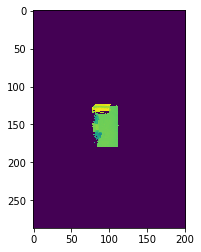

In [15]:
plt.imshow(A)

In [45]:
B = scipy.io.loadmat('/Users/rsingh/Oyla/Work/our_python_dev/oyla/enhancement/tmp2.mat')['v']

In [46]:
np.sum(B)

28123697.53664198

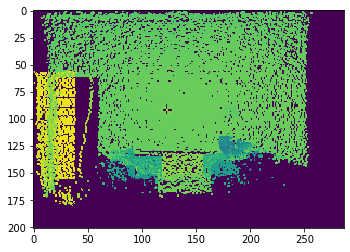

In [47]:
plt.imshow(np.rot90(B))

In [48]:
np.unique(B,return_counts=True)

(array([   0.        ,  377.25048208,  411.064439  , ..., 1192.40212065,
        1192.72227665, 1193.30660984]),
 array([26978,     1,     1, ...,     1,     1,     1]))

In [44]:
np.where(B>10)

(array([ 90,  91,  91,  92,  94,  94,  95,  97,  98, 161, 166, 167, 167,
        168, 170, 171, 172, 173, 173, 174, 174, 174, 174, 174, 175, 175,
        175, 175, 175, 176, 176, 176, 176, 176, 177, 177, 177, 177, 177,
        177, 178, 178, 178, 178, 178, 178, 178, 179, 179, 179, 179, 179,
        179, 180, 180, 180, 180, 181, 181, 181, 181, 181, 181, 182, 182,
        182, 182, 183, 183, 183, 184, 184, 185, 186, 187, 188, 188, 189,
        189, 190, 190, 192, 192, 195, 197]),
 array([64, 63, 64, 64, 60, 64, 64, 64, 63, 52, 65, 65, 66, 65, 65, 65, 65,
        74, 76, 66, 72, 73, 74, 80, 66, 71, 74, 79, 84, 69, 70, 71, 74, 75,
        65, 67, 68, 69, 70, 71, 65, 66, 67, 69, 70, 72, 82, 66, 69, 70, 74,
        77, 78, 66, 74, 76, 78, 69, 72, 74, 77, 78, 79, 69, 70, 74, 78, 69,
        70, 83, 71, 78, 73, 69, 67, 75, 77, 71, 72, 78, 79, 74, 75, 77, 77]))

In [37]:
B.shape

(287, 201)

In [49]:
286*200

57200

In [50]:
len(np.unique(B))

30637

In [127]:
A = scipy.io.loadmat('/Users/rsingh/Oyla/Data/07_Feb_data_February_07_18_54_22/collateral/masked_segmented.mat')

In [140]:
for i in range(1,999): 
    co = A[str(i+1)][2:,:] 
    sz = A[str(i+1)][1,:]
    dist=[] 
    for j in range(1,co.shape[1]): 
        for k in range(j+1,co.shape[1]): 
            #if sz[j] <800 and sz[j] >50 and sz[k] <800 and sz[k] >50:
            dist.append(np.sqrt(np.sum((co[:,j]-co[:,k])**2)))
    dist = np.asarray(dist)
    m = 0
    if len(dist)>0:
        m = dist[(np.where(dist>250) and np.where(dist<350))]  
        if len(m)>0:
            m = m[0]
        else:
            m = 0
    print(str(i)+','+str(m)     )

1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,0
10,0
11,0
12,0
13,0
14,0
15,0
16,0
17,0
18,0
19,0
20,0
21,0
22,0
23,0
24,0
25,0
26,0
27,0
28,0
29,0
30,0
31,0
32,0
33,0
34,0
35,0
36,0
37,0
38,0
39,0
40,0
41,0
42,0
43,0
44,0
45,0
46,0
47,0
48,0
49,0
50,0
51,0
52,0
53,0
54,0
55,0
56,0
57,0
58,0
59,0
60,0
61,0
62,0
63,0
64,0
65,0
66,0
67,0
68,0
69,0
70,0
71,0
72,0
73,0
74,0
75,0
76,0
77,0
78,0
79,0
80,0
81,0
82,0
83,0
84,0
85,0
86,0
87,0
88,0
89,0
90,0
91,0
92,0
93,0
94,0
95,0
96,0
97,0
98,0
99,0
100,0
101,0
102,0
103,0
104,0
105,0
106,0
107,0
108,0
109,0
110,0
111,0
112,0
113,0
114,0
115,0
116,0
117,0
118,0
119,0
120,0
121,0
122,0
123,0
124,228.1410632462462
125,225.6861903437696
126,222.00388036429356
127,213.4998558547739
128,208.94688026180881
129,217.22816757292924
130,217.71632916087773
131,293.400431518136
132,0
133,292.49234729357056
134,220.1532167078532
135,296.42413383774726
136,234.20854434061673
137,226.6488716288555
138,307.1778872317141
139,242.67075132779175
140,292.0805573283351
141,0

In [9]:
A['999']

array([[-1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.56000000e+02,  1.16000000e+02,  1.12000000e+02],
       [ 3.35114150e+01,  3.17557126e+02,  3.59203644e+02],
       [ 5.26464765e+02,  2.62256814e+02,  1.71673841e+02],
       [ 2.61307725e+03,  3.13973931e+03,  3.39031011e+03]])

In [132]:
np.asarray(dist)[np.where(np.asadist>900)]

TypeError: '>' not supported between instances of 'list' and 'int'

In [1]:
import scipy.io

In [2]:
A = scipy.io.loadmat('/Users/rsingh/Data/nyuv2/data_sample/data_01047.mat')

In [13]:
color = o3d.geometry.Image(np.asarray(A['images']))
depth = o3d.geometry.Image(A['depths'])

RuntimeError: Image can only be initialized from c-style buffer.

In [23]:
x = np.arange(36).reshape(3,4,3).astype(np.uint8)
img = o3d.geometry.Image(x)

In [21]:
x.shape

(3, 4, 3)

In [26]:
plt.imsave('/Users/rsingh/Downloads/rgb.png',A['images'])

In [27]:
plt.imsave('/Users/rsingh/Downloads/depth.png',A['depths'])

In [41]:
color_raw = o3d.io.read_image("/Users/rsingh/Downloads/rgb.png")
depth_raw = o3d.io.read_image("/Users/rsingh/Downloads/depth.png")
rgbd_image = o3d.geometry.RGBDImage.create_from_redwood_format(color_raw, depth_raw)

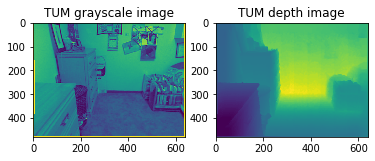

In [42]:
plt.subplot(1, 2, 1)
plt.title('TUM grayscale image')
plt.imshow(rgbd_image.color)
plt.subplot(1, 2, 2)
plt.title('TUM depth image')
plt.imshow(rgbd_image.depth)
plt.show()

In [43]:
pcd = o3d.geometry.PointCloud.create_from_rgbd_image(
    rgbd_image,
    o3d.camera.PinholeCameraIntrinsic(
        o3d.camera.PinholeCameraIntrinsicParameters.Kinect2DepthCameraDefault))
# Flip it, otherwise the pointcloud will be upside down
pcd.transform([[1, 0, 0, 0], [0, -1, 0, 0], [0, 0, -1, 0], [0, 0, 0, 1]])
o3d.visualization.draw_geometries([pcd])

In [44]:
np.asarray(pcd.points)

array([[-0.00026567,  0.00021409, -0.00038093],
       [-0.00026463,  0.00021409, -0.00038093],
       [-0.00026358,  0.00021409, -0.00038093],
       ...,
       [ 0.00046162, -0.00033052, -0.00044148],
       [ 0.00046282, -0.00033052, -0.00044148],
       [ 0.00046403, -0.00033052, -0.00044148]])

In [12]:
import numpy as np

In [27]:
A = np.load('oyla_WholeFoods_February_12_20_23_28_393.npy')[:,:,:5]

In [28]:
A.shape

(64, 512, 5)

In [33]:
pts = A[np.where(A[:,:,4]>0)][:,:3]

In [34]:
pcd = o3d.geometry.PointCloud()

In [35]:
pcd.points = o3d.utility.Vector3dVector(pts)

In [36]:
o3d.visualization.draw_geometries([pcd])

In [19]:
pts

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       ...,
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]], dtype=float32)

In [38]:
B = np.load('/Users/rsingh/Oyla/Work/our_python_dev/Testing_Raghav/pred_oyla_WholeFoods_February_12_20_23_28_393.npy')

In [39]:
B.shape

(64, 512)

In [44]:
labels = B[np.where(_filtered_phase>0)]

In [45]:
labels.shape

(22417,)

In [46]:
cmap = plt.get_cmap("tab20")

max_label = labels.max()
print("has %d clusters" % (max_label + 1))

colors = cmap(labels / (max_label if max_label > 0 else 1))
colors[labels <0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd])

has 4 clusters


In [28]:
_hsv = cv2.cvtColor(_rgb,cv2.COLOR_RGB2HSV)
_h,_s,_v = cv2.split(_hsv)

In [51]:
__h = np.divide(_h, filtered_phase/30000.0, out=np.zeros_like(_h), where=filtered_phase!=0)

In [52]:
__hsv=cv2.merge((__h,_s,_v))

In [53]:
__rgb = cv2.cvtColor(__hsv,cv2.COLOR_HSV2RGB)

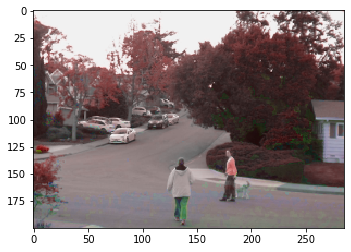

In [54]:
plt.imshow(__rgb)

In [42]:
np.max(__s)

35.506634

In [54]:
A = scipy.io.loadmat('/Users/rsingh/Oyla/Data/RHouse_RHD_March_31_19_25_36//data_1_107.mat')


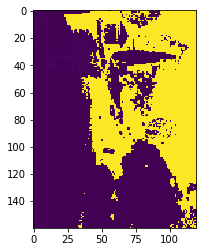

In [55]:
plt.imshow(A['data'][0][2][0][0][:,:,1])

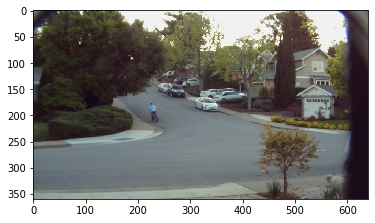

In [56]:
plt.imshow(A['data'][0][4])

In [62]:
bs = [1,4,16,32]
aa=[0.21, 0.72,3.3, 6.9]
aaa = [0.21, 0.21*4, 0.21*16, 0.21*32]
bb=[0.09,0.23,0.64,1.24]
bbb = [0.09, 0.09*4, 0.09*16, 0.09*32]

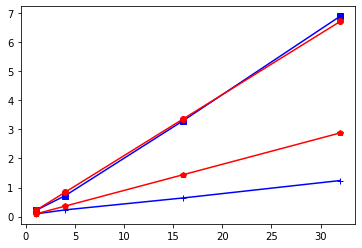

In [64]:
plt.plot(bs,aa,'b-s')
plt.plot(bs,aaa,'r-o')
plt.plot(bs,bb,'b-+')
plt.plot(bs,bbb,'r-p')

In [21]:
dir_ = '/Users/rsingh/Oyla/Data/SocDist2_data_August_21_20_11_31/oyla_output_fs_dus_spatialMedian_pclOutliersrm_1000rM_2200//'
B = scipy.io.loadmat(dir_+'depth_0107.mat')
C = plt.imread(dir_+'/rgb_0107.png')

In [47]:
#376.4607, 212.2415, 396.7143, 281.4638
frame =cv2.UMat(C).get()
_=cv2.rectangle(frame,(376,212),(396,281),(0,255,0),2)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


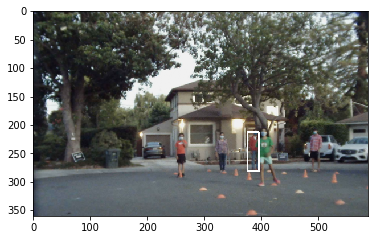

In [48]:
plt.imshow(frame)

0.0

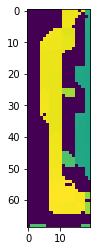

In [49]:
plt.imshow(B['dist'][212:281,376:396])
np.mean(B['dist'][211:252,298:311])

In [100]:
pcd = o3d.io.read_point_cloud(dir_+'/pcl_0945.xyz')
pcd

geometry::PointCloud with 27048 points.

In [101]:
depth = B['dist']
index = np.ravel_multi_index(np.where(depth>0),depth.shape)
index.shape


(27048,)

In [102]:
_d = depth.copy()
_d[_d>0] = 1
_d[108:148,145:160] *= -1
ind = np.ravel_multi_index(np.where(_d==-1),_d.shape)
_,ind,_ = np.intersect1d(index,ind,return_indices = True)

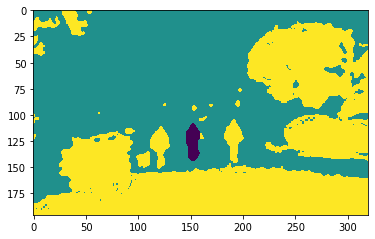

In [103]:
plt.imshow(_d)

In [104]:
masked_pcd = pcd.select_by_index(ind)

In [105]:
o3d.visualization.draw_geometries([masked_pcd])

In [119]:
A  = cv2.imread('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47/oyla_output_fs_dus_spatialMedian////phase_png/oyla_0990.png',cv2.IMREAD_UNCHANGED)

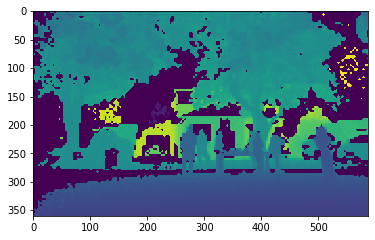

In [120]:
plt.imshow(A)

In [121]:
B  = cv2.imread('/Users/rsingh/Oyla/Data/SocDist2_data_August_21_19_53_47/oyla_output_FiltBeforeCalib_fs_dus_spatialMedian////phase_png/oyla_0990.png',cv2.IMREAD_UNCHANGED)

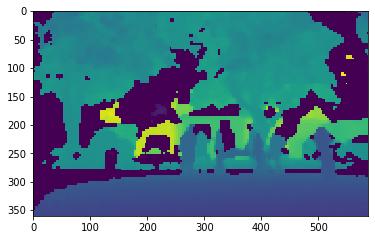

In [122]:
plt.imshow(B)

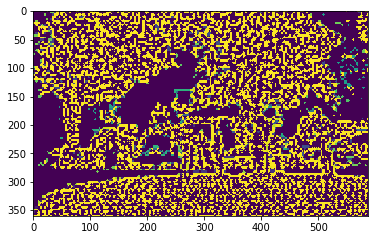

In [123]:
plt.imshow(B-A)